In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor #importing of VIF 
from sklearn.decomposition import PCA

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('temp_fore.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.drop(["Date","Location"],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8350 non-null   float64
 1   MaxTemp        8365 non-null   float64
 2   Rainfall       8185 non-null   float64
 3   Evaporation    4913 non-null   float64
 4   Sunshine       4431 non-null   float64
 5   WindGustDir    7434 non-null   object 
 6   WindGustSpeed  7434 non-null   float64
 7   WindDir9am     7596 non-null   object 
 8   WindDir3pm     8117 non-null   object 
 9   WindSpeed9am   8349 non-null   float64
 10  WindSpeed3pm   8318 non-null   float64
 11  Humidity9am    8366 non-null   float64
 12  Humidity3pm    8323 non-null   float64
 13  Pressure9am    7116 non-null   float64
 14  Pressure3pm    7113 non-null   float64
 15  Cloud9am       6004 non-null   float64
 16  Cloud3pm       5970 non-null   float64
 17  Temp9am        8369 non-null   float64
 18  Temp3pm 

In [6]:
df.shape

(8425, 21)

All the unncessary columns that are not required by understanding the features are been dropped

**Exploratory Data Analysis**

In [7]:
df.describe(include="all")

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434,7434.000000,7596,8117,8349.000000,...,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000,8185,8186
unique,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,N,NaN,N,SE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,NaN,NaN,NaN,NaN,NaN,713,NaN,906,813,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6195,6195
mean,13.193305,23.859976,2.805913,5.389395,7.632205,NaN,40.174469,NaN,NaN,13.847646,...,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,NaN,NaN
std,5.403596,6.136408,10.459379,5.044484,3.896235,NaN,14.665721,NaN,NaN,10.174579,...,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020,NaN,NaN
min,-2.000000,8.200000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,NaN,0.000000,...,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,NaN,NaN
25%,9.200000,19.300000,0.000000,2.600000,4.750000,NaN,30.000000,NaN,NaN,6.000000,...,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000,NaN,NaN
50%,13.300000,23.300000,0.000000,4.600000,8.700000,NaN,39.000000,NaN,NaN,13.000000,...,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000,NaN,NaN
75%,17.400000,28.000000,1.000000,7.000000,10.700000,NaN,50.000000,NaN,NaN,20.000000,...,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000,NaN,NaN


***Check for duplicates***

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape 

(6752, 21)

There are some duplicates that are been removed

***Check for null values***

In [10]:
df.isnull().sum()

MinTemp            60
MaxTemp            47
Rainfall          130
Evaporation      2911
Sunshine         3226
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

we have no proper data there are so many null values-->So these can be dropped

After that we will deal with the outliers

In [11]:
df.isnull().sum()

MinTemp            60
MaxTemp            47
Rainfall          130
Evaporation      2911
Sunshine         3226
WindGustDir       932
WindGustSpeed     932
WindDir9am        784
WindDir3pm        284
WindSpeed9am       53
WindSpeed3pm       90
Humidity9am        44
Humidity3pm        86
Pressure9am      1298
Pressure3pm      1301
Cloud9am         1856
Cloud3pm         1892
Temp9am            41
Temp3pm            82
RainToday         130
RainTomorrow      130
dtype: int64

In [12]:
df.shape

(6752, 21)

In [13]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64':
        numerical_cols.append(x)

In [14]:
#as all the numerical columns are having skewness replace it with the median

for i in numerical_cols:
    df[i].fillna(df[i].mean(),inplace=True)

In [15]:
df.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      932
WindGustSpeed      0
WindDir9am       784
WindDir3pm       284
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        130
RainTomorrow     130
dtype: int64

In [16]:
print(df['WindGustDir'].mode())
print(df['WindDir9am'].mode())
print(df['WindDir3pm'].mode())
print(df['RainToday'].mode())
print(df['RainTomorrow'].mode())

0    E
Name: WindGustDir, dtype: object
0    N
Name: WindDir9am, dtype: object
0    SE
Name: WindDir3pm, dtype: object
0    No
Name: RainToday, dtype: object
0    No
Name: RainTomorrow, dtype: object


In [17]:
df['WindGustDir'].fillna("E",inplace=True)
df['WindDir9am'].fillna("N",inplace=True)
df['WindDir3pm'].fillna("SE",inplace=True)
df['RainToday'].fillna("No",inplace=True)
df['RainTomorrow'].fillna("No",inplace=True)

All the null values are dropped

In [18]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6752 entries, 0 to 8424
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6752 non-null   float64
 1   MaxTemp        6752 non-null   float64
 2   Rainfall       6752 non-null   float64
 3   Evaporation    6752 non-null   float64
 4   Sunshine       6752 non-null   float64
 5   WindGustDir    6752 non-null   object 
 6   WindGustSpeed  6752 non-null   float64
 7   WindDir9am     6752 non-null   object 
 8   WindDir3pm     6752 non-null   object 
 9   WindSpeed9am   6752 non-null   float64
 10  WindSpeed3pm   6752 non-null   float64
 11  Humidity9am    6752 non-null   float64
 12  Humidity3pm    6752 non-null   float64
 13  Pressure9am    6752 non-null   float64
 14  Pressure3pm    6752 non-null   float64
 15  Cloud9am       6752 non-null   float64
 16  Cloud3pm       6752 non-null   float64
 17  Temp9am        6752 non-null   float64
 18  Temp3pm      

All the null values are removed

***check for outliers***

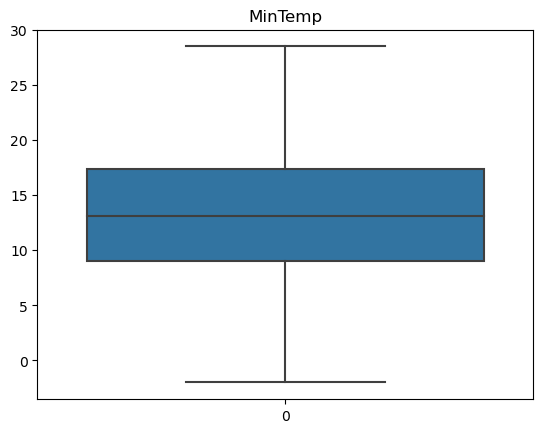

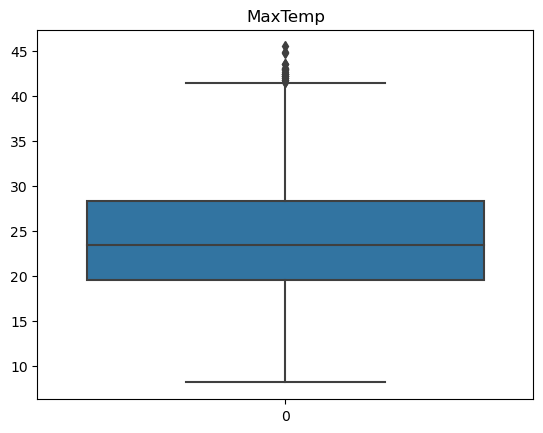

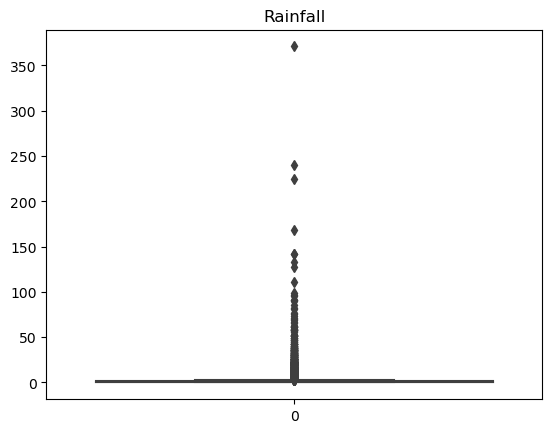

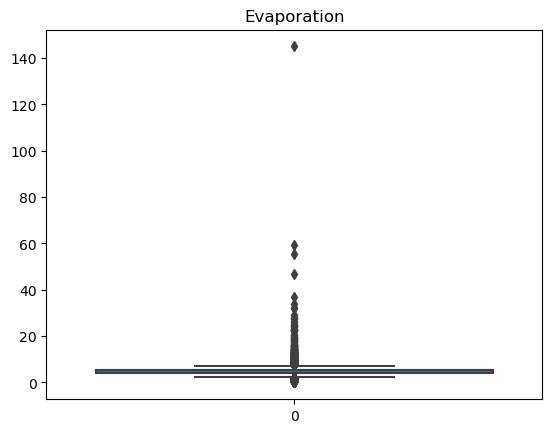

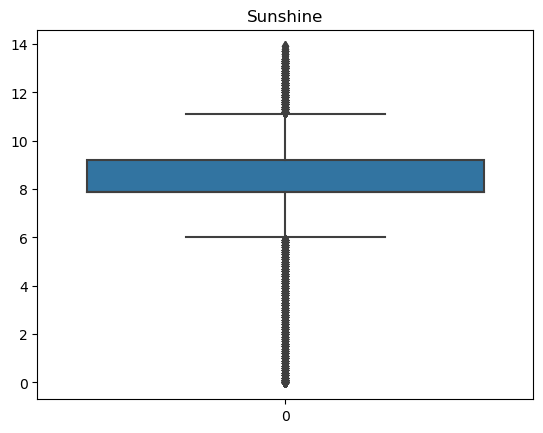

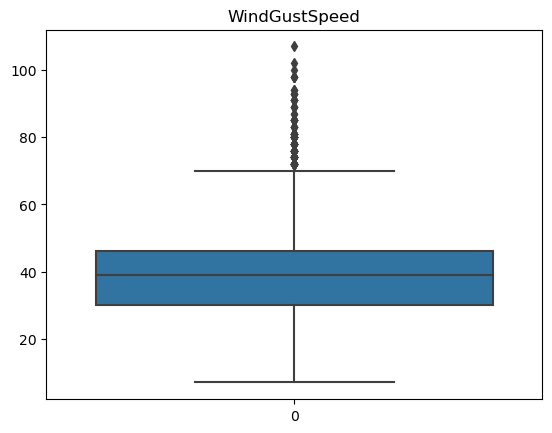

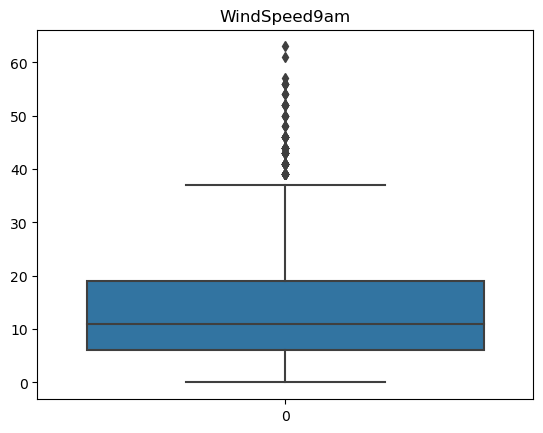

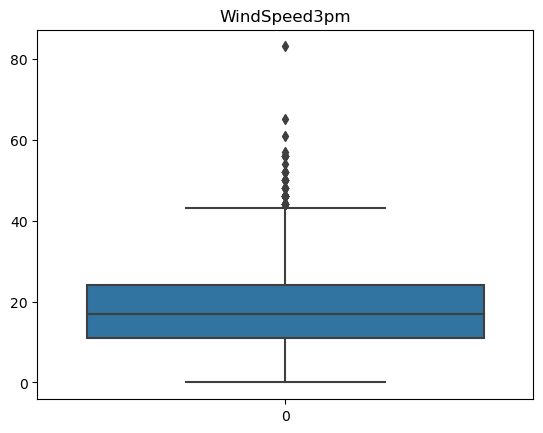

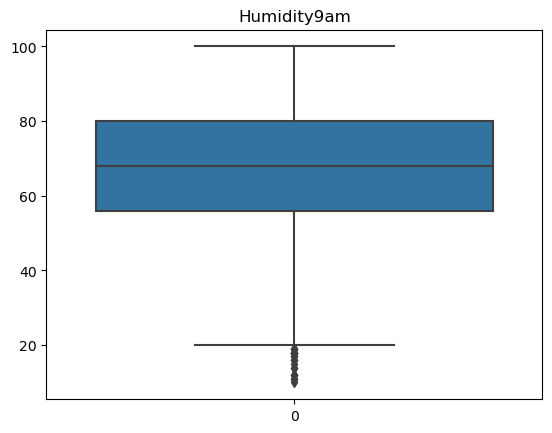

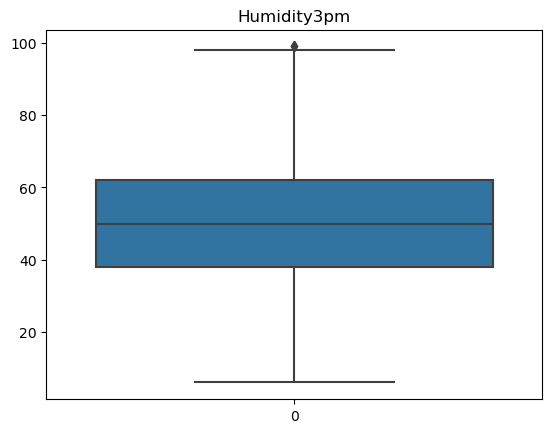

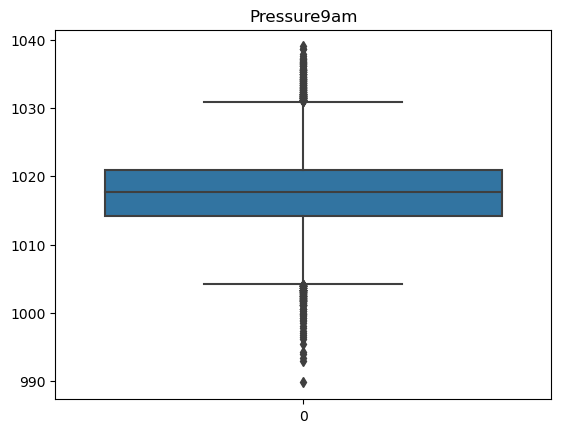

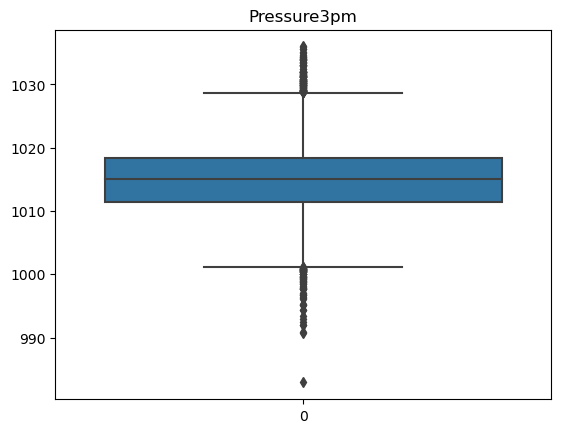

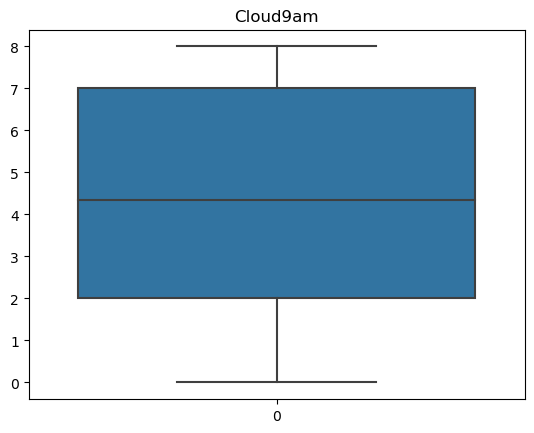

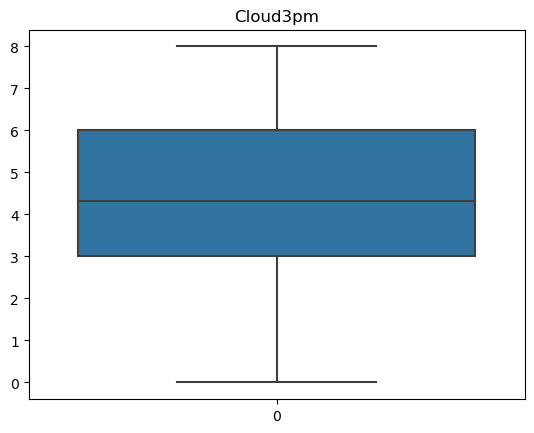

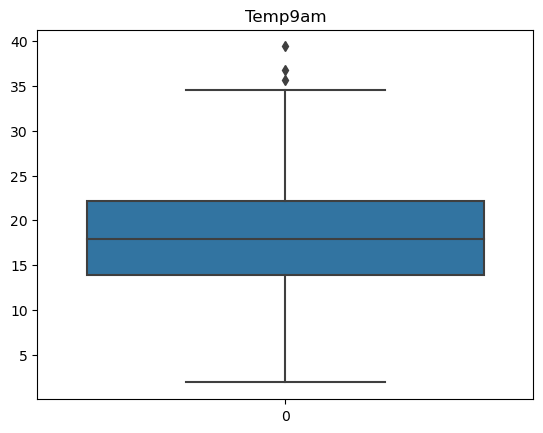

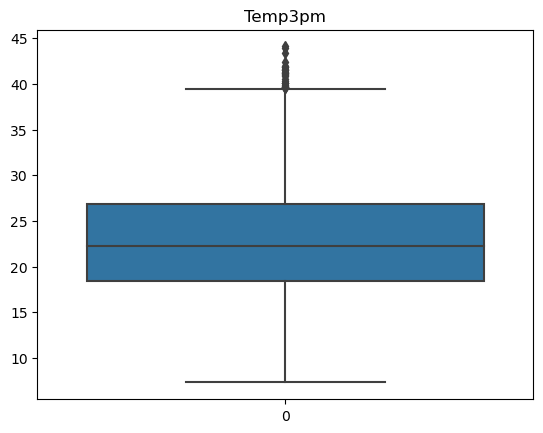

In [20]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()


In [21]:
for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

-3.599999999999998
29.999999999999996
6.400000000000006
41.599999999999994
-1.7999999999999998
3.0
2.046407185628742
7.255988023952097
5.927240499149178
11.163655700510493
6.0
70.0
-13.5
38.5
-8.5
43.5
20.0
116.0
2.0
98.0
1004.1500000000001
1030.9499999999998
1001.1500000000001
1028.75
-5.5
14.5
-1.5
10.5
1.450000000000001
34.65
5.799999999999995
39.400000000000006


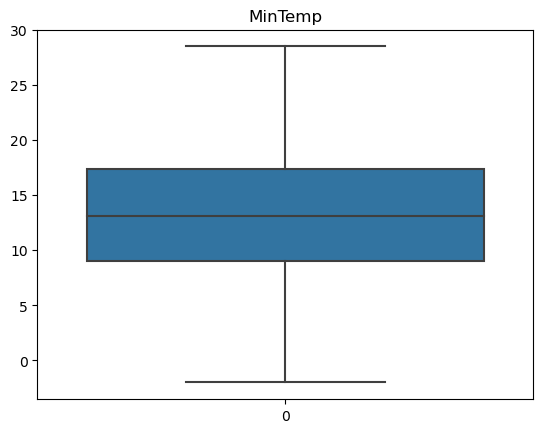

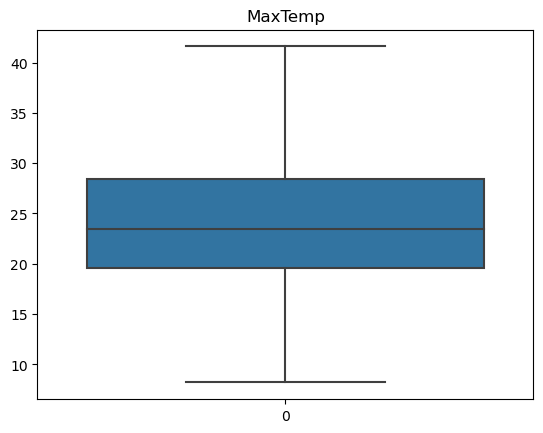

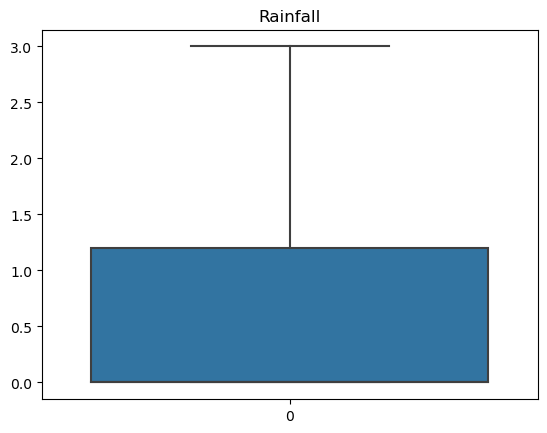

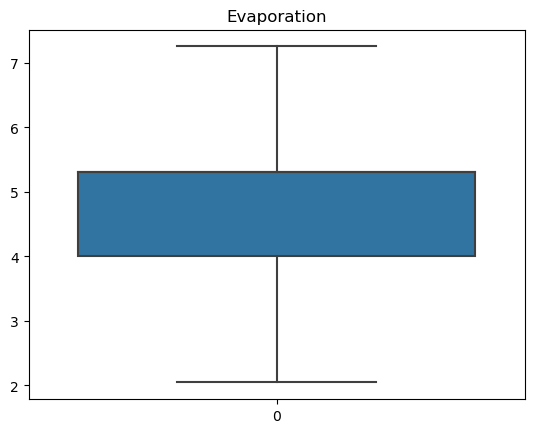

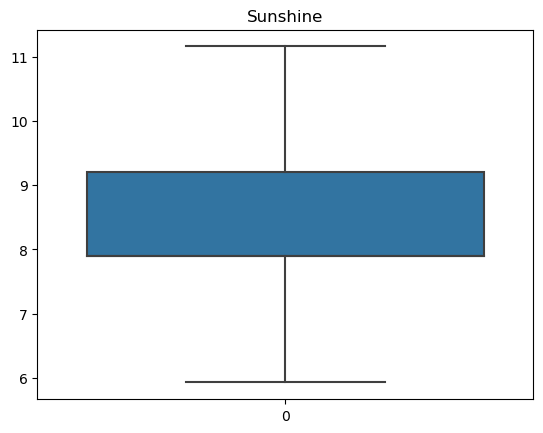

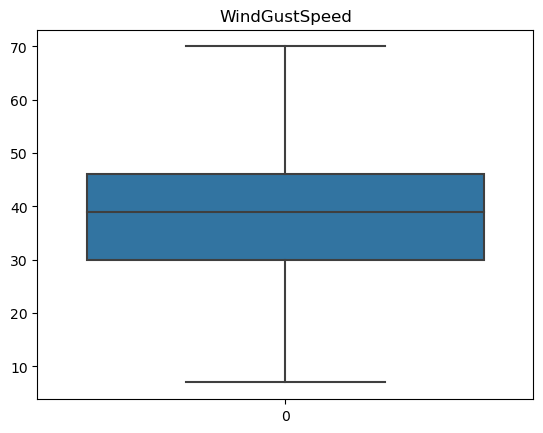

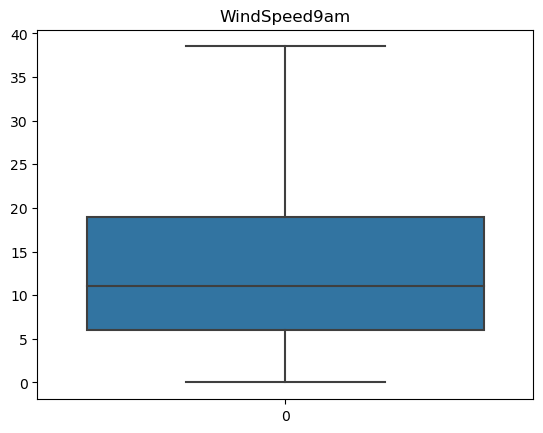

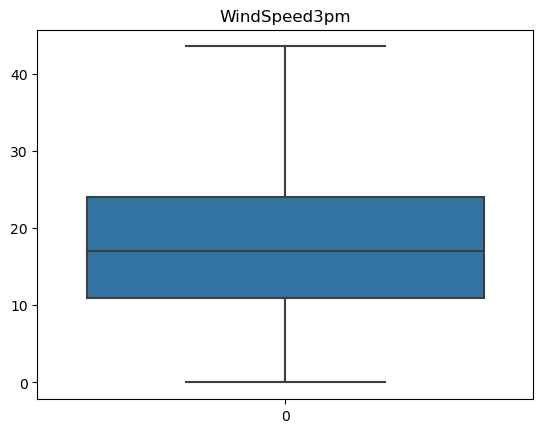

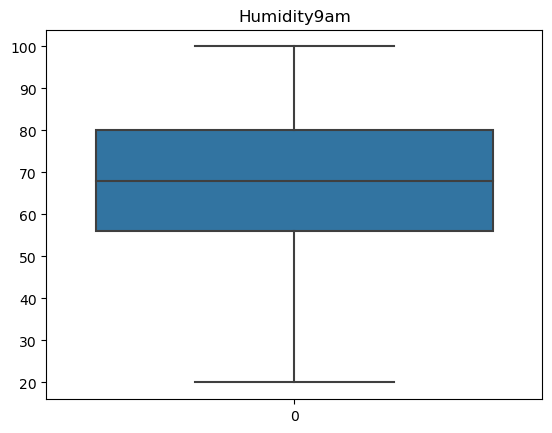

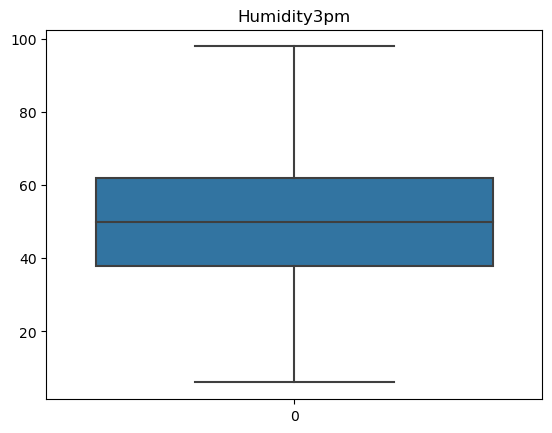

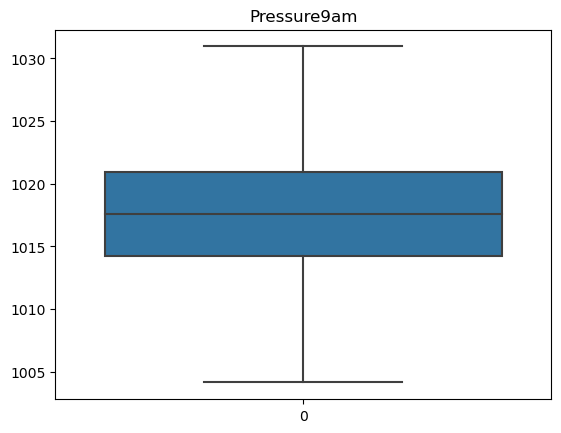

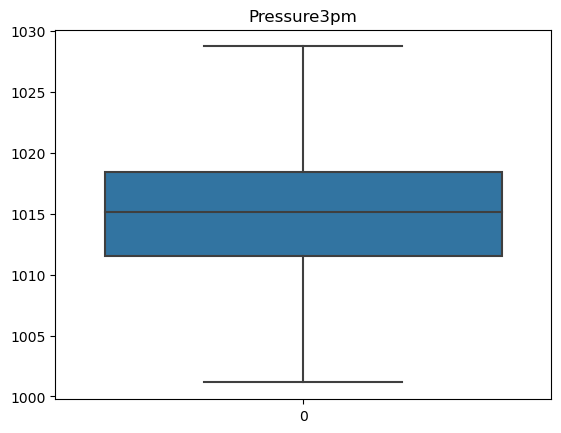

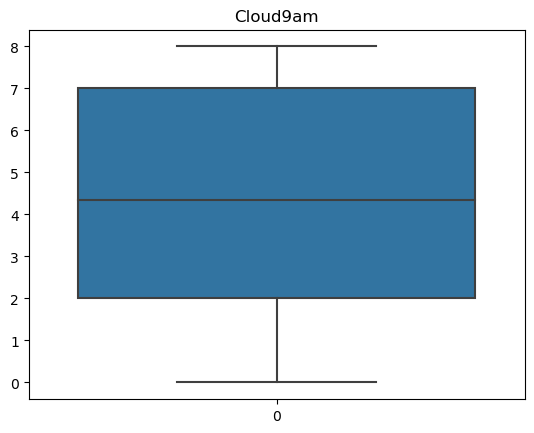

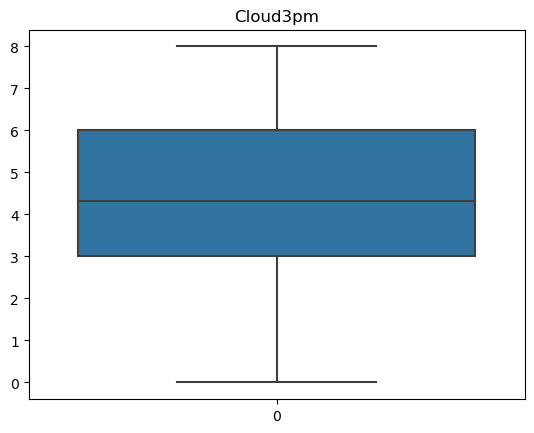

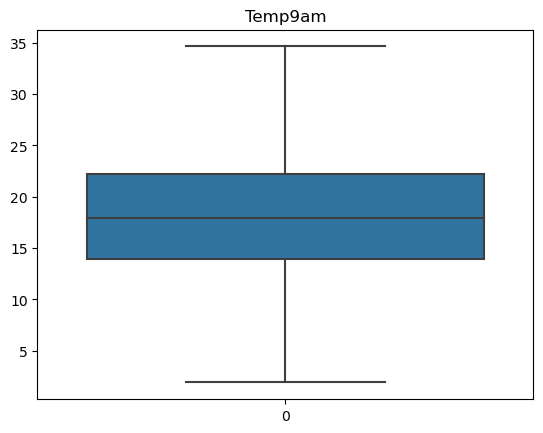

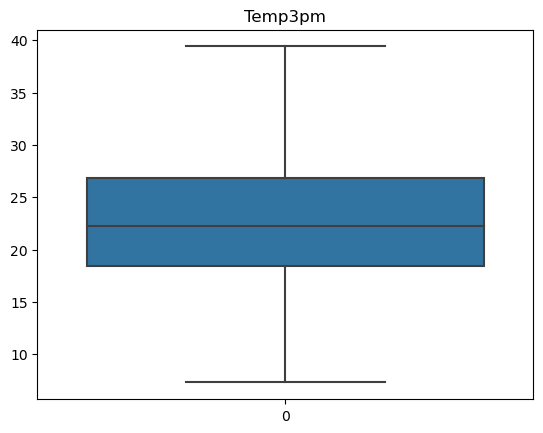

In [22]:
for i in numerical_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

So the outliers which are present in some of the features are also removed

***check for skewness***

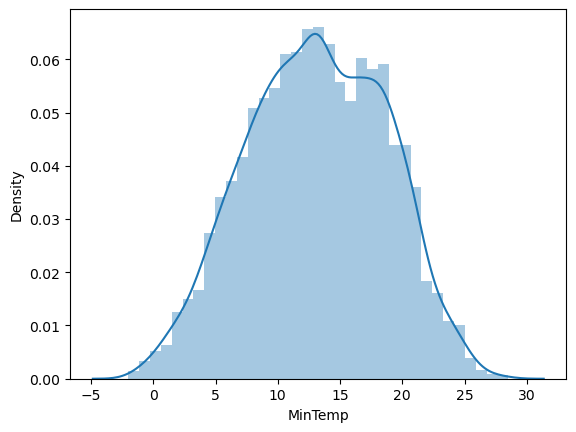

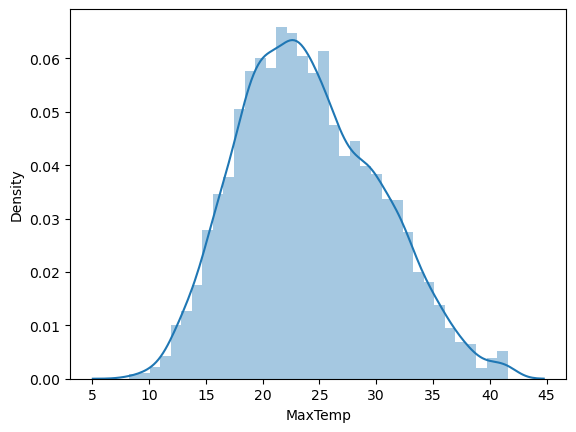

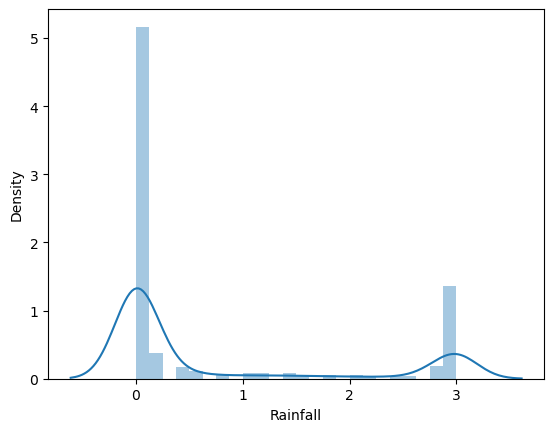

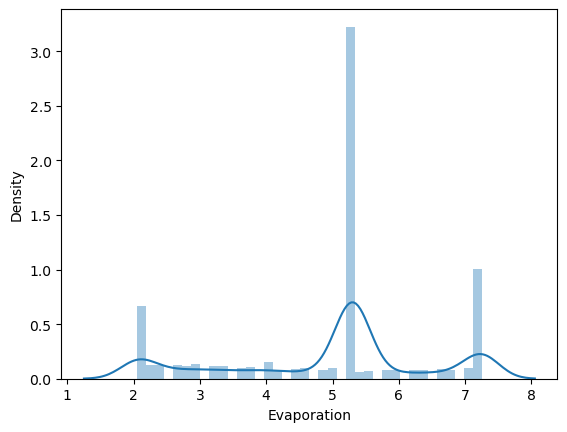

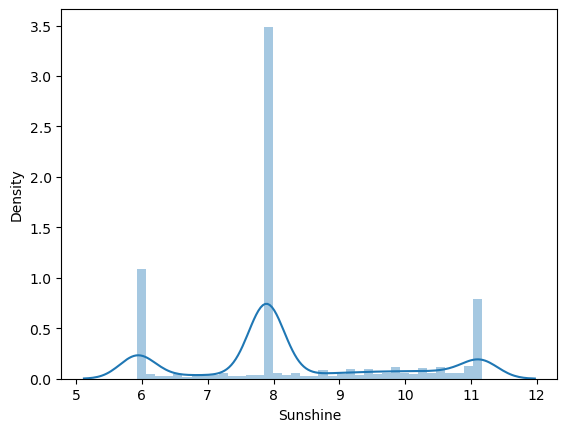

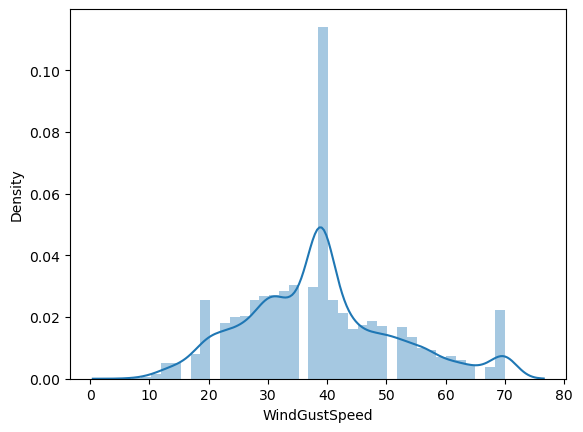

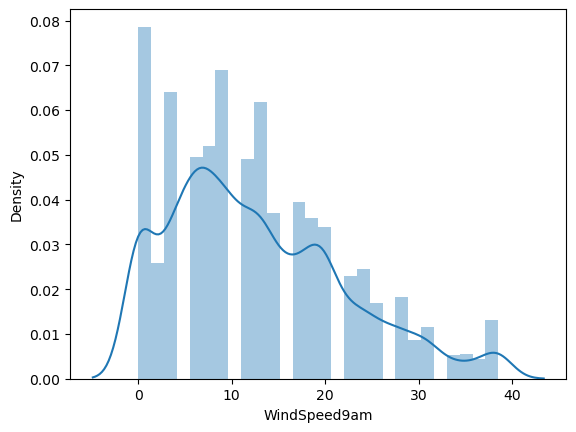

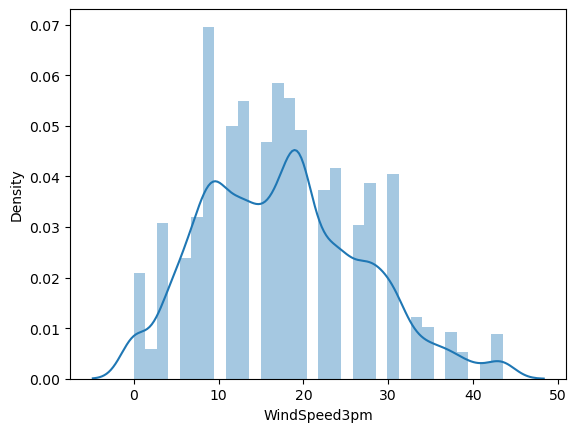

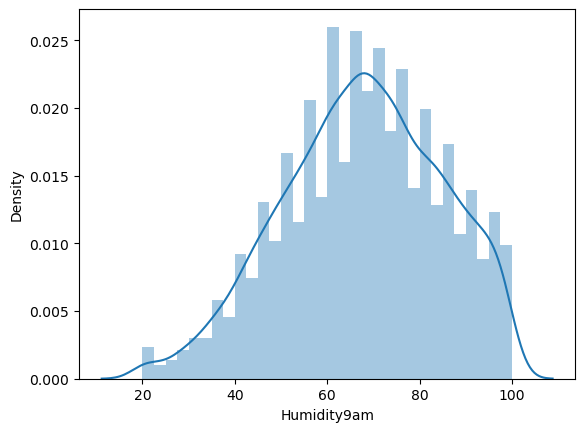

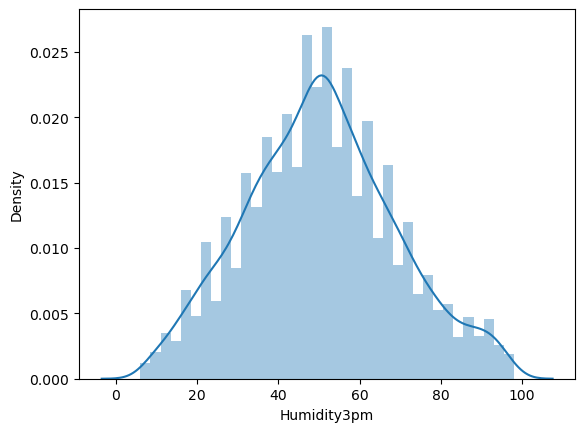

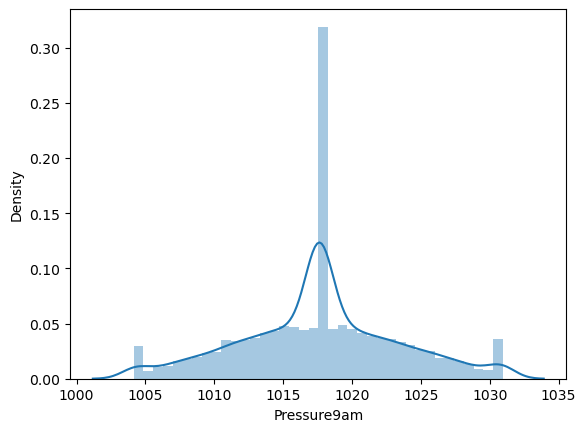

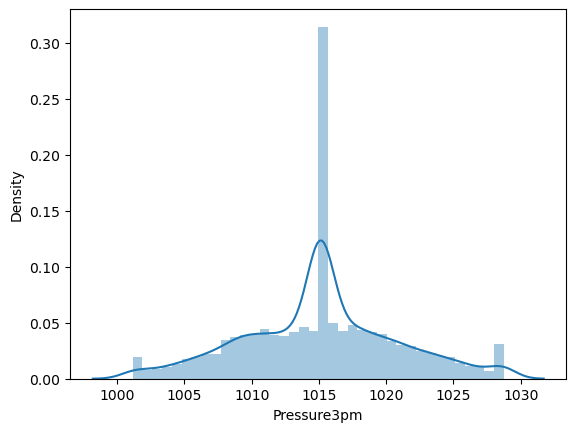

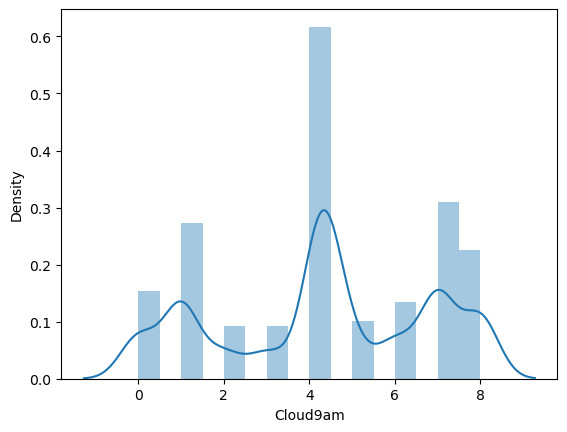

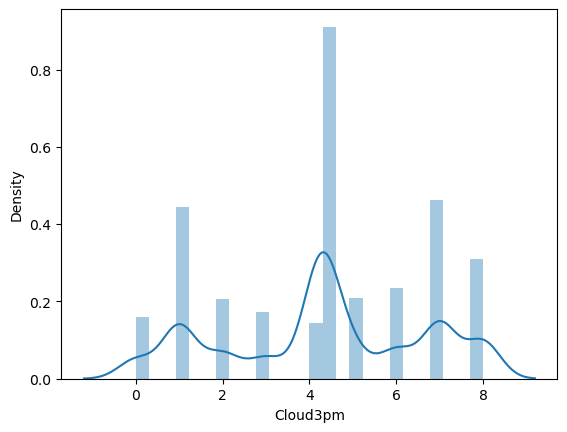

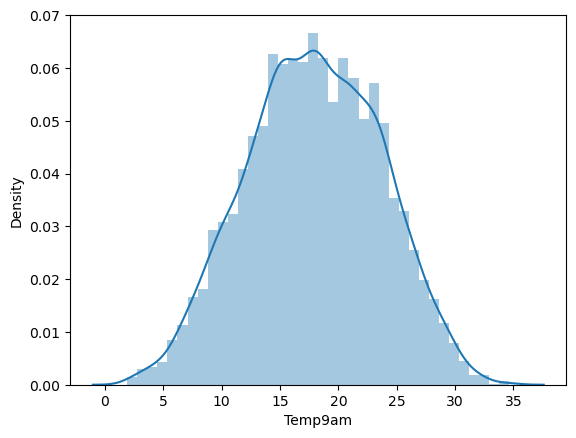

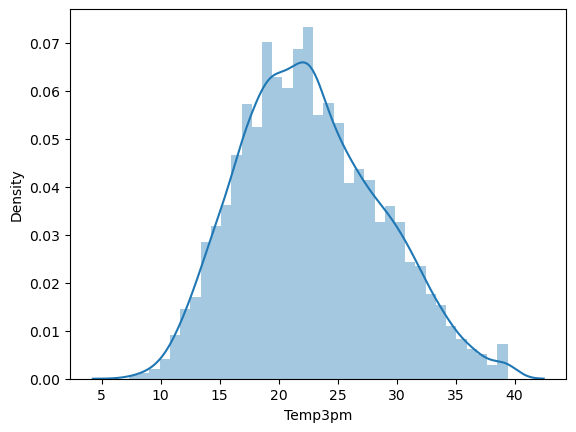

In [23]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Transformation to get rid of skewness

In [24]:
for i in numerical_cols:
    df[i] = np.sqrt(df[i])

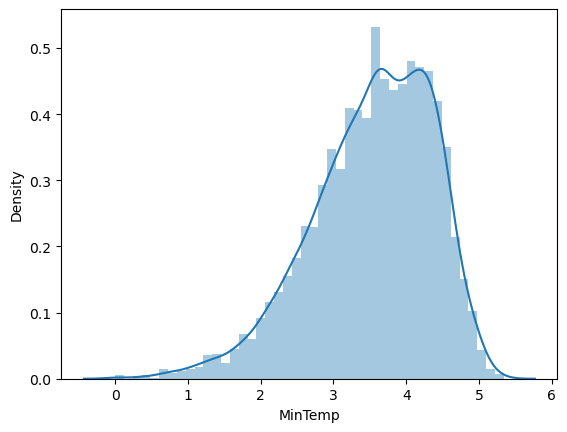

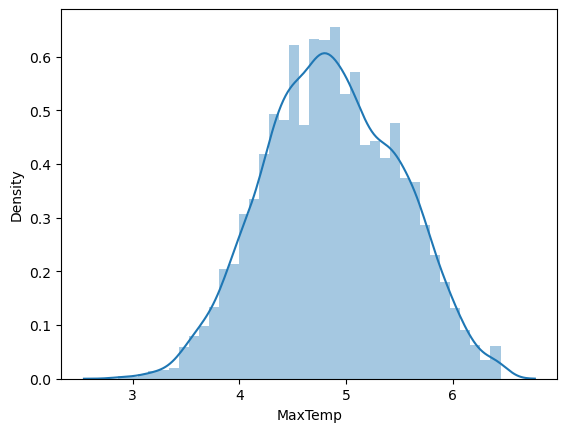

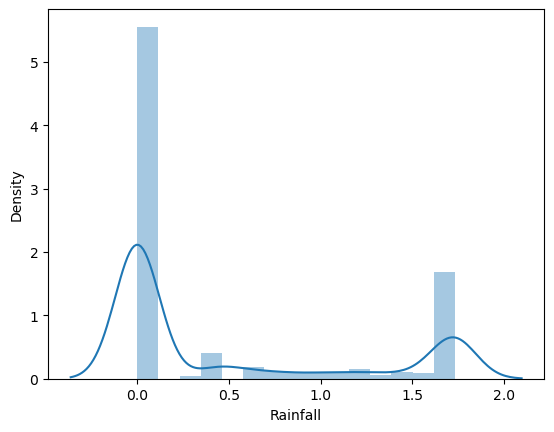

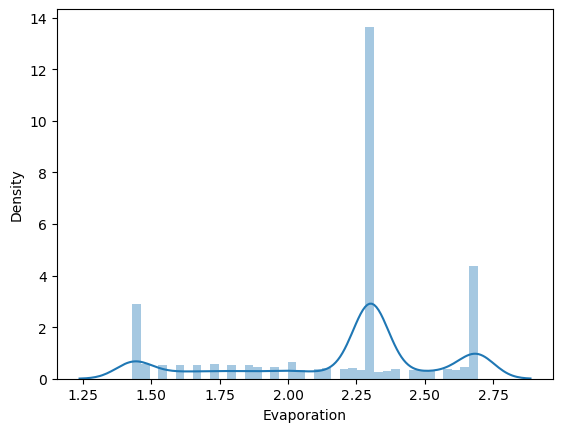

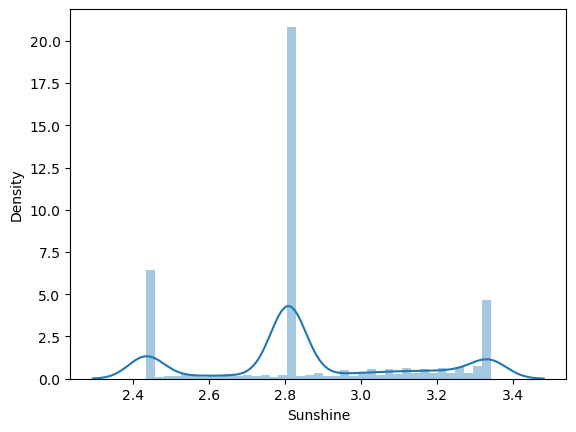

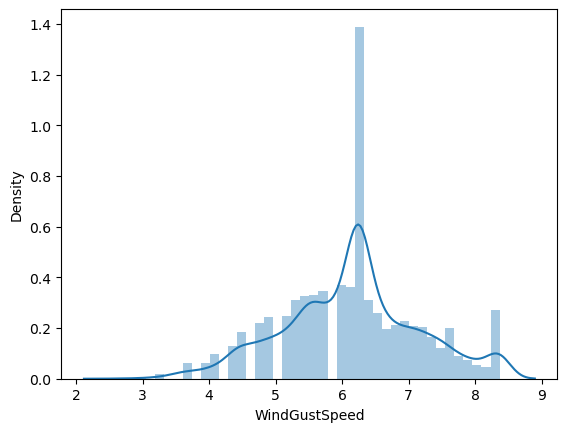

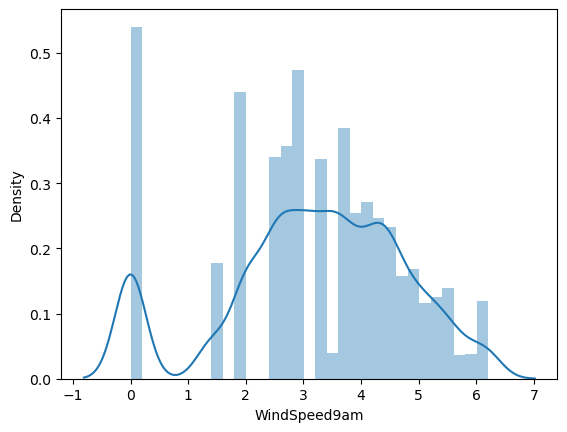

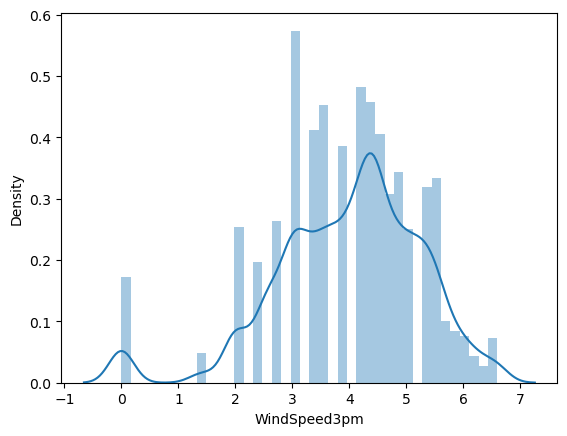

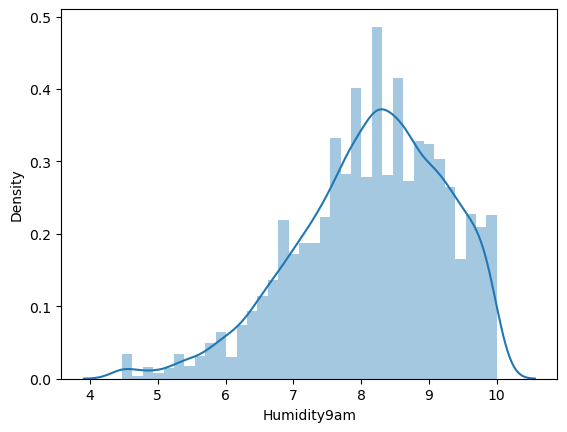

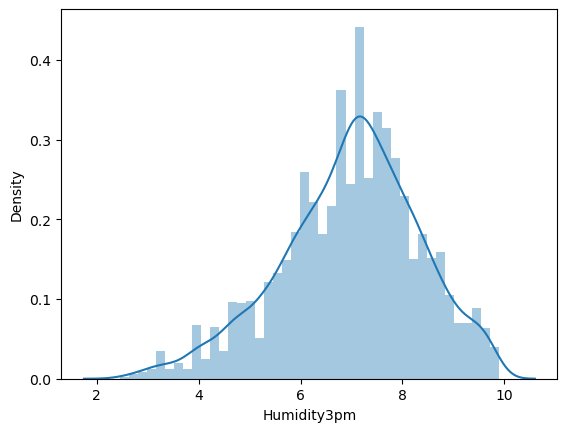

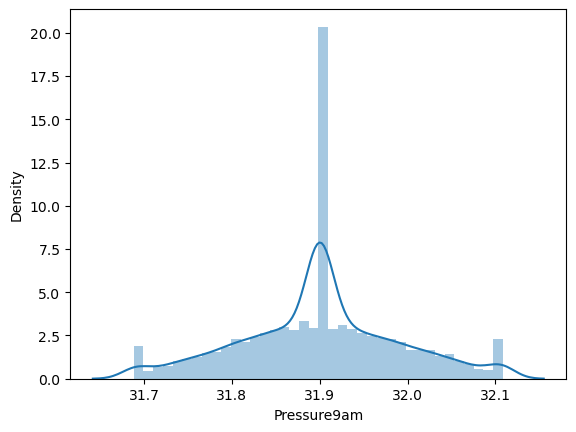

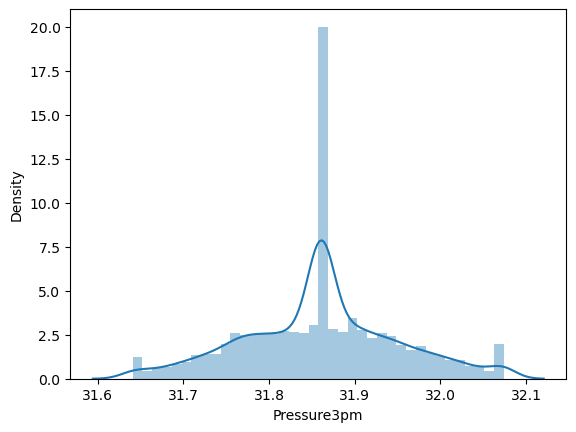

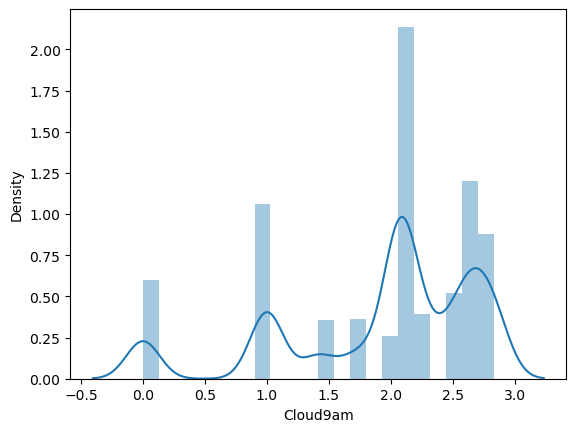

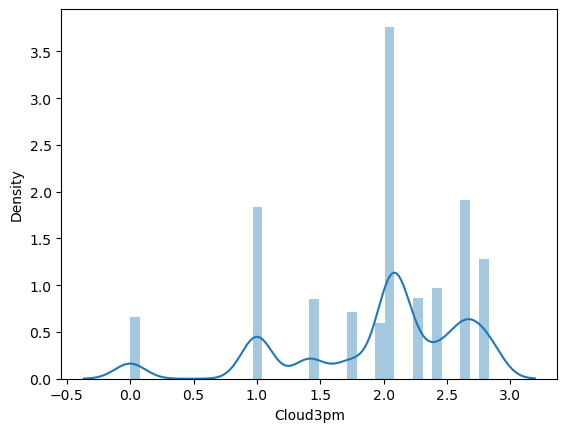

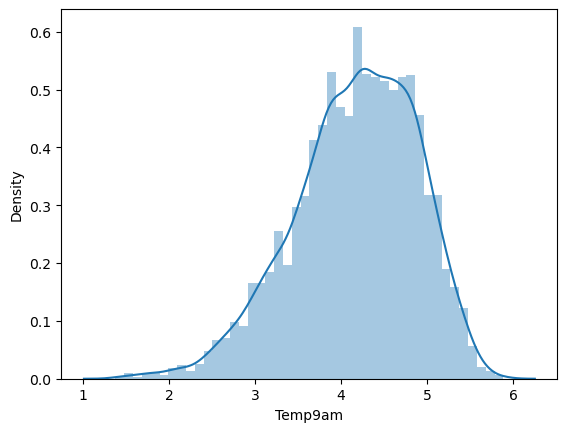

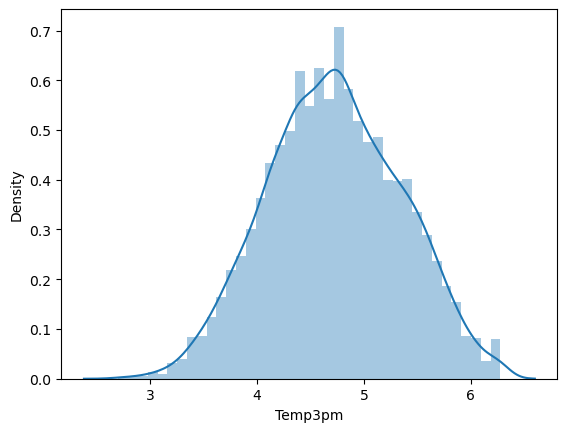

In [25]:
for i in numerical_cols:
    sns.distplot(df[i],kde=True)
    plt.show()

Skewness is managed

***encoding***

In [26]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [27]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3.660601,4.785394,0.774597,2.302693,2.809074,13,6.633250,13,14,4.472136,...,8.426150,4.690416,31.744291,31.734839,2.828427,2.078699,4.110961,4.669047,0,0
1,2.720294,5.009990,0.000000,2.302693,2.809074,14,6.633250,6,15,2.000000,...,6.633250,5.000000,31.789936,31.745866,2.082500,2.078699,4.147288,4.929503,0,0
2,3.591657,5.069517,0.000000,2.302693,2.809074,15,6.782330,13,15,4.358899,...,6.164414,5.477226,31.742716,31.760038,2.082500,1.414214,4.582576,4.816638,0,0
3,3.033150,5.291503,0.000000,2.302693,2.809074,4,4.898979,9,0,3.316625,...,6.708204,4.000000,31.899843,31.824519,2.082500,2.078699,4.254409,5.147815,0,0
4,4.183300,5.683309,1.000000,2.302693,2.809074,13,6.403124,1,7,2.645751,...,9.055385,5.744563,31.793081,31.717503,2.645751,2.828427,4.219005,5.449771,0,0


In [28]:
df.drop(['WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [29]:
df.isnull().sum()

MinTemp          30
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustSpeed     0
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RainTomorrow      0
dtype: int64

In [30]:
df.dropna(inplace=True)

***Check for Correlation between feautures***

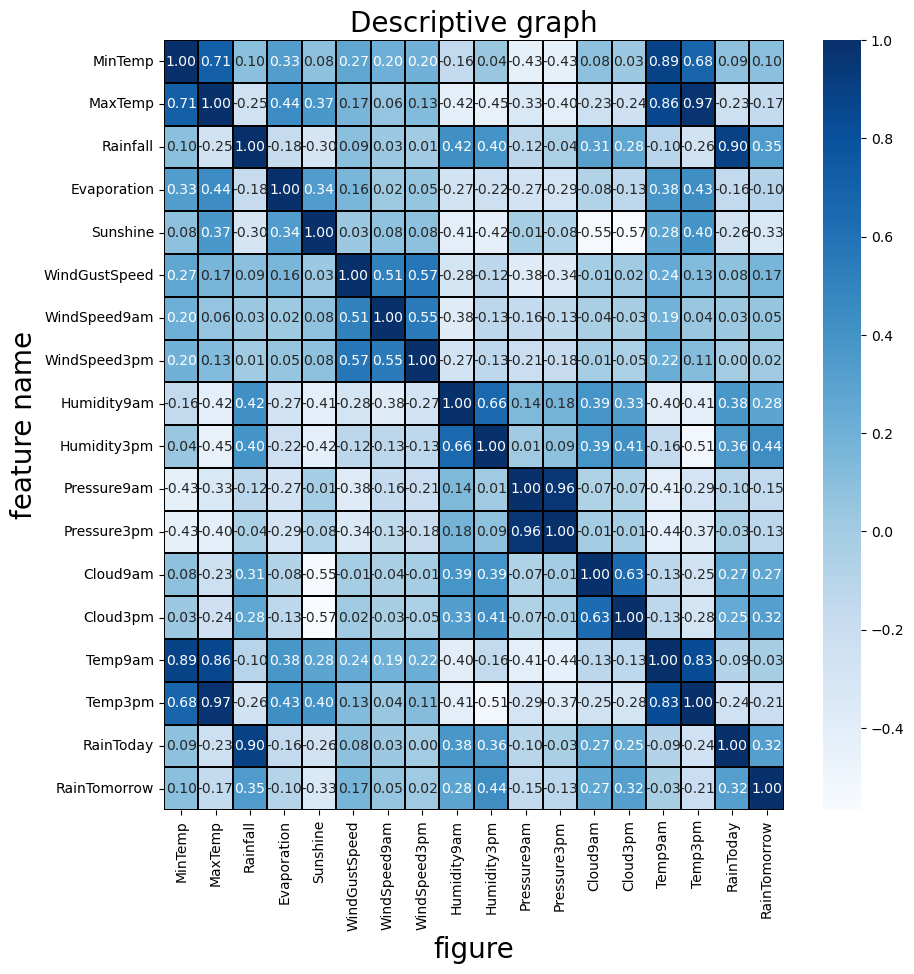

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [32]:
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

In [33]:
calc_vif(df)

,Variables,VIF FACTOR
0,MinTemp,1.485606e+02
1,MaxTemp,1.587437e+03
2,Rainfall,8.465559e+00
3,Evaporation,5.001475e+01
4,Sunshine,2.260621e+02
5,WindGustSpeed,6.888497e+01
6,WindSpeed9am,9.743908e+00
7,WindSpeed3pm,1.921621e+01
8,Humidity9am,2.366287e+02
9,Humidity3pm,1.489673e+02


As you can see there in no much inflation in the variance it is totally fine

So correlation between features are rectified

***PART1 REGRESSION MODEL RAINFALL***

***check of correlation with the features with the target***

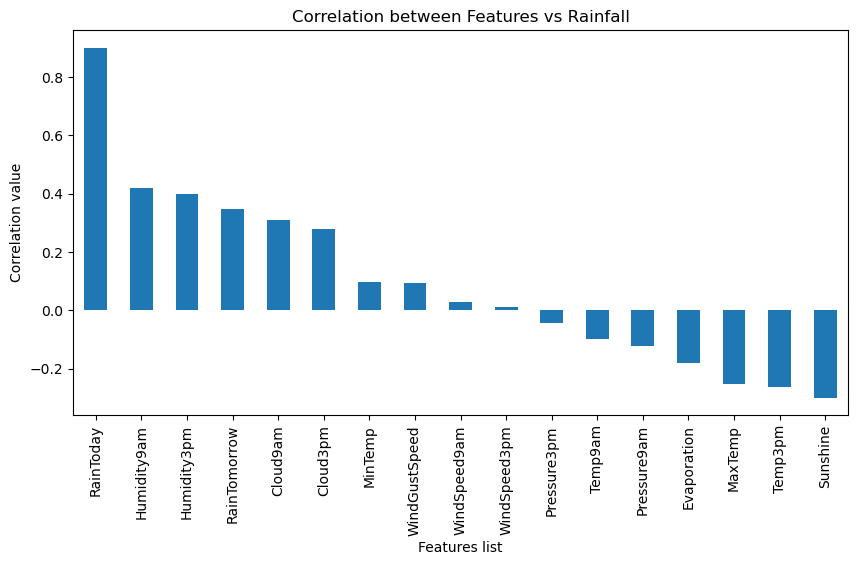

In [34]:
df_corr=df.corr()
plt.figure(figsize=(10,5))
df_corr['Rainfall'].sort_values(ascending=False).drop('Rainfall').plot.bar()
plt.title("Correlation between Features vs Rainfall")
plt.xlabel('Features list')
plt.ylabel('Correlation value')
plt.show()

***Splitting of data into features and target***

In [35]:
x=df.drop(['Rainfall'],axis=1)
y=df['Rainfall']

***Scaling or standardization of parameters***

In [36]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.15373023, -0.14293823,  0.29111602, ..., -0.09542704,
        -0.55202901, -0.55225838],
       [-0.9783481 ,  0.21849546,  0.29111602, ...,  0.32224319,
        -0.55202901, -0.55225838],
       [ 0.07072536,  0.3142897 ,  0.29111602, ...,  0.14125129,
        -0.55202901, -0.55225838],
       ...,
       [-1.45571744,  0.50258049,  0.29111602, ...,  0.6097914 ,
        -0.55202901, -0.55225838],
       [-0.89099715,  0.51808001,  0.29111602, ...,  0.59408179,
        -0.55202901, -0.55225838],
       [ 0.3938581 ,  0.05598622,  0.29111602, ..., -0.25161115,
        -0.55202901, -0.55225838]])

***Find the best random score***

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.861421753109669
random state  182


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [40]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=158)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [41]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.8361193307362114
R2 score train data : 82.44978053008309
Mean absolute error: 0.18221005195487544
Mean squared error: 0.0807177697003905
Root Mean squared error: 0.4268606938509043


In [42]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8316475502972186
R2 score train data : 97.47237988154434
Mean absolute error: 0.17866275504059645
Mean squared error: 0.08292030002472262
Root Mean squared error: 0.42268517248727383


In [43]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.8167069952800224
R2 score train data : 86.06832879033446
Mean absolute error: 0.16849354888655454
Mean squared error: 0.09027911961272954
Root Mean squared error: 0.4104796570922298


In [44]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.8361346994476795
R2 score train data : 82.44976852872689
Mean absolute error: 0.1822373894402301
Mean squared error: 0.08071019999666375
Root Mean squared error: 0.42689271420373304


Out of these KNN regressor gives the best results

***Hyperparameter tuning for regression***

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=63)

model = KNN()

param_grid = {
    'n_neighbors': range(1, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}
Best Score: 0.8021053533908905
Test Set Score: 0.8184676186461144


In [50]:
best_model = KNN(n_neighbors=8,weights='distance',metric='euclidean')

best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
print(best_model.score(x_test, y_test))

Test MSE: 0.09038358018767427
0.8184676186461144


***saving the model***

In [52]:
import joblib

joblib.dump(best_model, 'rainfall.joblib')

['rainfall.joblib']

In [53]:
loaded_model = joblib.load('rainfall.joblib')

In [54]:
x

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,3.660601,4.785394,2.302693,2.809074,6.633250,4.472136,4.898979,8.426150,4.690416,31.744291,31.734839,2.828427,2.078699,4.110961,4.669047,0,0
1,2.720294,5.009990,2.302693,2.809074,6.633250,2.000000,4.690416,6.633250,5.000000,31.789936,31.745866,2.082500,2.078699,4.147288,4.929503,0,0
2,3.591657,5.069517,2.302693,2.809074,6.782330,4.358899,5.099020,6.164414,5.477226,31.742716,31.760038,2.082500,1.414214,4.582576,4.816638,0,0
3,3.033150,5.291503,2.302693,2.809074,4.898979,3.316625,3.000000,6.708204,4.000000,31.899843,31.824519,2.082500,2.078699,4.254409,5.147815,0,0
4,4.183300,5.683309,2.302693,2.809074,6.403124,2.645751,4.472136,9.055385,5.744563,31.793081,31.717503,2.645751,2.828427,4.219005,5.449771,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1.673320,4.837355,2.302693,2.809074,5.567764,3.605551,3.316625,7.141428,4.898979,32.009374,31.942135,2.082500,2.078699,3.178050,4.732864,0,0
8421,1.897367,5.029911,2.302693,2.809074,4.690416,3.605551,3.000000,7.483315,4.582576,31.992187,31.923346,2.082500,2.078699,3.301515,4.949747,0,0
8422,2.323790,5.186521,2.302693,2.809074,6.082763,3.000000,3.000000,7.280110,4.898979,31.953091,31.887302,2.082500,2.078699,3.535534,5.108816,0,0
8423,2.792848,5.196152,2.302693,2.809074,5.291503,3.605551,2.645751,7.141428,4.898979,31.928044,31.882597,1.732051,1.414214,3.885872,5.099020,0,0


***test the model***

In [55]:
t=np.array([4.183300,5.683309,2.302693,2.809074,6.403124,2.645751,4.472136,9.055385,5.744563,31.793081,31.717503,2.645751,2.828427,4.219005,5.449771,0,0])

In [56]:
t=t.reshape(1,-1)

In [57]:
loaded_model.predict(t) 

array([0.65074633])

We are getting proper results

# ***PART2 CLASSIFICATION RAIN TOMORROW***

imbalance data converting into balance data

RainTomorrow
0    5151
1    1571
Name: count, dtype: int64


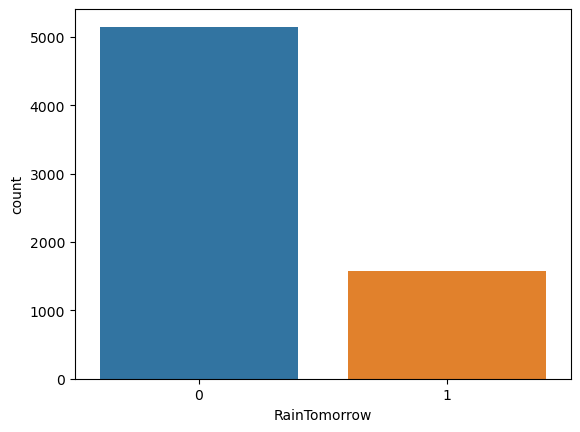

In [59]:
ax=sns.countplot(x='RainTomorrow',data=df)
print(df['RainTomorrow'].value_counts())

In [60]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [61]:
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']

In [62]:
x,y=sm.fit_resample(x,y)

***Scaling or standardization of parameters***

In [63]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[ 0.09781969, -0.02819122,  0.18187159, ..., -0.08199894,
         0.04508398, -0.68360248],
       [-1.07831836,  0.33535518, -0.8318439 , ..., -0.02850937,
         0.46229873, -0.68360248],
       [ 0.01158432,  0.43170938, -0.8318439 , ...,  0.61242259,
         0.2815042 , -0.68360248],
       ...,
       [-0.19095933, -0.47293394,  0.18187159, ..., -0.58807933,
        -0.35040006, -0.68360248],
       [-1.00067288, -0.8014261 ,  1.43489283, ..., -0.86267457,
        -0.94386743,  1.46283846],
       [ 0.1931654 ,  0.02151487, -0.09007766, ...,  0.55536788,
        -0.05649239, -0.68360248]])

***Find the best random score***

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB as MNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [65]:
lr=LogisticRegression()
maxAcc=0
rs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=accuracy_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.8012422360248447
random state  96


In [66]:
def classify(clf,X,y):
        x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=96)
        
        #train the model
        clf.fit(x_train,y_train)
        
        #predicting Ytest
        pred=clf.predict(x_test)
        
        #accuracy score
        acc_score=accuracy_score(y_test,pred)
        print("Accuracy score",acc_score)
        
        #confusion matrix
        print("Confusion matrix :\n",confusion_matrix(y_test,pred))
        
        #classification report
        print("Classification report :\n",classification_report(y_test,pred))
        
        #cross validation score
        cv_score=(cross_val_score(clf,x,y,cv=5).mean())
        print("cross validation score ",cv_score)
        
        #Result of accuracy minus cv scores
        result=acc_score-cv_score
        print("The final result of accuracy minus cross validation is ",result)

In [67]:
clf=LogisticRegression()
classify(clf,X,y)

Accuracy score 0.8012422360248447
Confusion matrix :
 [[1073  273]
 [ 239  991]]
Classification report :
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1346
           1       0.78      0.81      0.79      1230

    accuracy                           0.80      2576
   macro avg       0.80      0.80      0.80      2576
weighted avg       0.80      0.80      0.80      2576

cross validation score  0.7545187791768535
The final result of accuracy minus cross validation is  0.046723456847991174


In [68]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy score 0.8113354037267081
Confusion matrix :
 [[1069  277]
 [ 209 1021]]
Classification report :
               precision    recall  f1-score   support

           0       0.84      0.79      0.81      1346
           1       0.79      0.83      0.81      1230

    accuracy                           0.81      2576
   macro avg       0.81      0.81      0.81      2576
weighted avg       0.81      0.81      0.81      2576

cross validation score  0.7310463861920173
The final result of accuracy minus cross validation is  0.08028901753469075


In [69]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy score 0.904891304347826
Confusion matrix :
 [[1195  151]
 [  94 1136]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1346
           1       0.88      0.92      0.90      1230

    accuracy                           0.90      2576
   macro avg       0.90      0.91      0.90      2576
weighted avg       0.91      0.90      0.90      2576

cross validation score  0.7862785055798156
The final result of accuracy minus cross validation is  0.11861279876801045


So the best model is randomForest classifer

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=96)
model = RandomForestClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (accuracy):", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score (accuracy): 0.8770385628221069


In [72]:
best_model=RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=1,min_samples_split=2)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=96)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
acc_score=accuracy_score(y_test,pred)
print("Accuracy score",acc_score)
print("Confusion matrix :\n",confusion_matrix(y_test,pred))
print("Classification report :\n",classification_report(y_test,pred))

Accuracy score 0.9021739130434783
Confusion matrix :
 [[1193  153]
 [  99 1131]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1346
           1       0.88      0.92      0.90      1230

    accuracy                           0.90      2576
   macro avg       0.90      0.90      0.90      2576
weighted avg       0.90      0.90      0.90      2576



In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
y_pred_prob=best_model.predict_proba(x_test)[:,1]

In [75]:
y_pred_prob

array([0.09, 0.59, 0.84, ..., 0.2 , 0.93, 0.01])

In [76]:
from sklearn.metrics import roc_curve

In [77]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

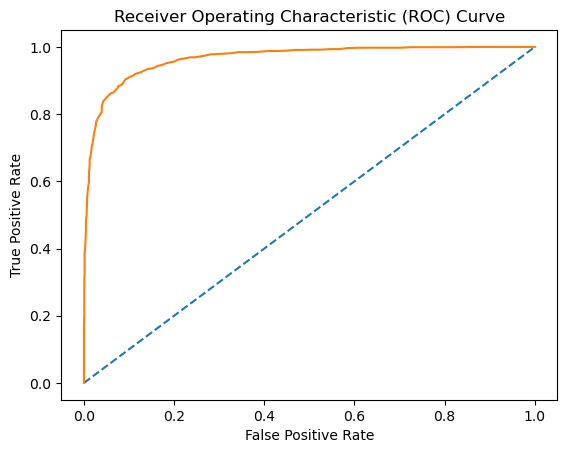

In [78]:
plt.plot([0, 1], [0, 1],linestyle='--')
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

***Saving the model***

In [79]:
import joblib

joblib.dump(best_model, 'Rain_tom.joblib')

['Rain_tom.joblib']

In [80]:
loaded_model = joblib.load('Rain_tom.joblib')

In [81]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3.660601,4.785394,0.774597,2.302693,2.809074,6.633250,4.472136,4.898979,8.426150,4.690416,31.744291,31.734839,2.828427,2.078699,4.110961,4.669047,0
1,2.720294,5.009990,0.000000,2.302693,2.809074,6.633250,2.000000,4.690416,6.633250,5.000000,31.789936,31.745866,2.082500,2.078699,4.147288,4.929503,0
2,3.591657,5.069517,0.000000,2.302693,2.809074,6.782330,4.358899,5.099020,6.164414,5.477226,31.742716,31.760038,2.082500,1.414214,4.582576,4.816638,0
3,3.033150,5.291503,0.000000,2.302693,2.809074,4.898979,3.316625,3.000000,6.708204,4.000000,31.899843,31.824519,2.082500,2.078699,4.254409,5.147815,0
4,4.183300,5.683309,1.000000,2.302693,2.809074,6.403124,2.645751,4.472136,9.055385,5.744563,31.793081,31.717503,2.645751,2.828427,4.219005,5.449771,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,3.761025,5.165175,0.386443,2.302693,2.809074,6.243209,0.000000,2.000000,8.284393,6.592473,31.900256,31.860947,1.864113,1.000000,4.391012,5.089258,0
10298,4.502589,5.196416,0.000000,2.276871,2.434592,6.731182,4.039695,5.097369,8.576729,8.179897,31.895401,31.876743,2.645751,2.645751,4.943653,4.996852,0
10299,3.429726,4.510637,0.774597,1.567173,2.434592,6.633250,3.872983,4.811545,8.965538,8.108850,31.942263,31.906318,2.530375,1.220960,3.767258,4.422157,0
10300,2.782371,4.307697,1.732051,1.430527,2.434592,5.277021,3.594892,3.594892,9.323401,9.019900,31.891376,31.871509,2.023824,2.251183,3.580767,4.051671,1


In [82]:
t=np.array([3.03315,.291503,0.000000,2.302693,2.809074,4.898979,3.316625,3.000000,6.708204,4.000000,31.899843,31.824519,2.082500,2.078699,4.254409,5.147815,0])
t=t.reshape(1,-1)
loaded_model.predict(t) 

array([0])

You can see the model is giving the perfect result.

**COMPLETED**